In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

In [4]:
# motor parameters

p = 4
flux_linkage = 0.02 # [Wb]
L_q = 0.3e-3 # [H]
L_d = 0.1e-3 # [H]
R = 20e-3


# inverter parameters
I_m = 300 # [A] max phase current
V_bus = 150 # [V]

In [5]:
# Base speed, not including L

base_speed_electrical = V_bus / flux_linkage
print(f'base speed electrical [rad/s]: {base_speed_electrical}')

base_speed_mechanical_rpm = base_speed_electrical / p / (2*math.pi) * 60
print(f'base speed mechanical [rpm]: {base_speed_mechanical_rpm}')

base speed electrical [rad/s]: 7500.0
base speed mechanical [rpm]: 17904.931097838227


In [6]:
# Base speed, including L

I_q = 300
I_d = math.sqrt(I_m ** 2 - I_q ** 2)

flux_q = L_q * I_q
flux_d = L_d * I_d + flux_linkage

print(f'flux q {flux_q:.3f} d {flux_d:.3f}')

total_flux = math.sqrt(flux_q ** 2 + flux_d ** 2)

base_speed_electrical = V_bus / total_flux
print(f'base speed electrical [rad/s]: {base_speed_electrical}')

base_speed_mechanical_rpm = base_speed_electrical / p / (2*math.pi) * 60
print(f'base speed mechanical [rpm]: {base_speed_mechanical_rpm}')


flux q 0.090 d 0.020
base speed electrical [rad/s]: 1626.9784336399214
base speed mechanical [rpm]: 3884.1249002655404


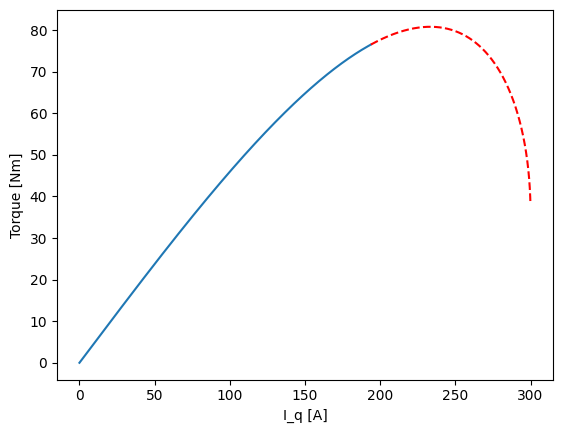

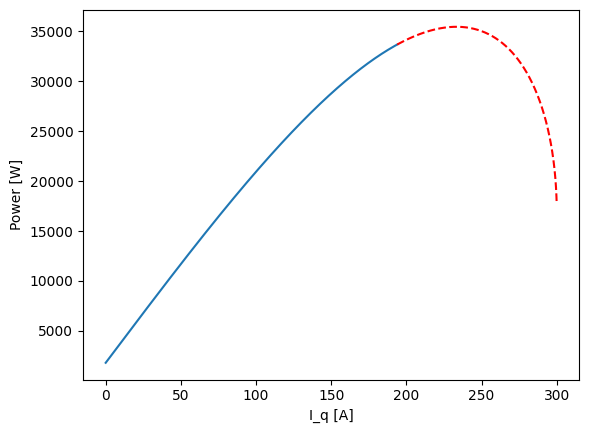

In [11]:
# torque curve

I_m = 300
omega = 2500

I_qs = np.arange(0, I_m, 0.1)
I_ds = -np.sqrt(I_m ** 2 - I_qs ** 2)

torque = 3 / 2 * p * (flux_linkage * I_qs + (L_d - L_q) * I_ds * I_qs)

V_ds = I_ds * R - omega * L_q * I_qs # + d flux_d / dt
V_qs = I_qs * R + omega * L_d * I_ds + omega * flux_linkage # + d flux_q / dt
V_total = np.sqrt(V_ds ** 2 + V_qs ** 2)

voltage_flt = V_total < V_bus
voltage_out_of_range = np.logical_not(voltage_flt)

plt.plot(I_qs[voltage_flt], torque[voltage_flt])
plt.plot(I_qs[voltage_out_of_range], torque[voltage_out_of_range], 'r--')
plt.xlabel("I_q [A]")
plt.ylabel("Torque [Nm]")
plt.show()

P = I_ds * V_ds + I_qs * V_qs # times some constant?

plt.plot(I_qs[voltage_flt], P[voltage_flt])
plt.plot(I_qs[voltage_out_of_range], P[voltage_out_of_range], 'r--')
plt.xlabel("I_q [A]")
plt.ylabel("Power [W]")
plt.show()